# ACM Mini Project

For this task, we will use 3 machine learing algorithms:
    1. Support Vector Machine (supervised)
    2. Random Forest          (supervised)
    3. K Means Clusters       (unsupervised)

We run this on a simple, relatively small dataset of size 150, imported from sk learn, the iris flower dataset.
The data has 4 features, and the label can be any of 3 flower types

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
print('Feature Names are:')
print(iris.feature_names)
print('\n\n')
print('Target/Label Names are:')
print(iris.target_names)

Feature Names are:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



Target/Label Names are:
['setosa' 'versicolor' 'virginica']


In [20]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target                                             # appending column with target as number
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])     # appending column with flower name
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Our dataset is such that, our first flower setosa is the first 50 records, the next 50 being versicolor, and last 50 being virginica. Hence we can split our data into 3 parts

In [21]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

`Since we have 4 feature labels, we cannot easily visualize how our support vector machine splits our data, because plotting this data will have 4 dimensions. However, just to build intuition, we can take pairs of features and see how the data looks after plotting`

### Sepal length vs Sepal Width (Setosa vs Versicolor) 

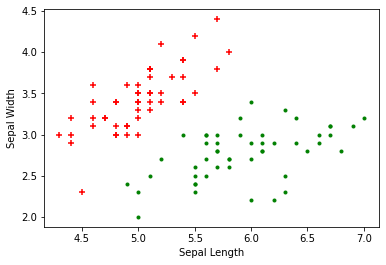

In [80]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="red",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="green",marker='.')

### Petal length vs Pepal Width (Setosa vs Versicolor)

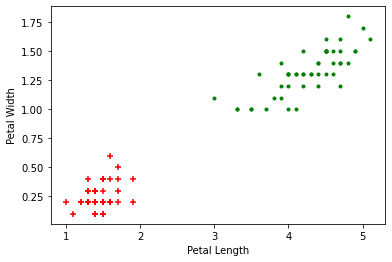

In [81]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="red",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="green",marker='.')

When we take only two attributes at a time, we can see clear clusters, indicating that these parameters are indeed a factor in classing our flowers.

Now we will build a SVM using sk learn. We will consider all 4 attributes at once, and also analyse what happens when we tweak the parameters.
## 1.Train Using Support Vector Machine (SVM)

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','flower_name'], axis='columns')                       #setting up training data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    #spilting in 80-20 ratio

In [27]:
from sklearn.svm import SVC
model = SVC()                                                               #here we build the support vector classifier

For the above model, default parameters are passed, C = 1, and gamma = 1/n (where n are features)

In [35]:
model.fit(X_train, y_train)
print('Accuracy is:')
print(model.score(X_test, y_test))                                          #we run our model on the test set

Accuracy is:
0.9


We can tune the parameters as follows
#### 1.Regularization (C)

In [82]:
model_C = SVC(C=10)                                                       #change C to 10 
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

#### 2.Gamma


In [53]:
model_g = SVC(gamma=0.02)                                                  #change gamma to 0.02
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.8666666666666667

We notice however we train the model, our accuracy is capped at around 97%, no matter how we tweak the parameters

Let us plot the confusion matrix, for our original model on the test set (having 30 elements)

In [56]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  3,  9]], dtype=int64)

Let us make it more visually appealing

Text(69.0, 0.5, 'Truth')

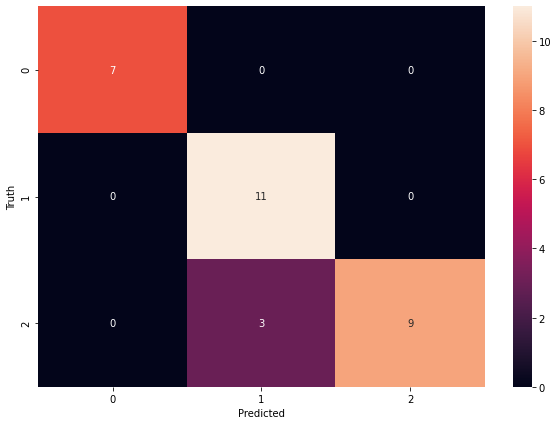

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Along the principal diagonal, the numbers represent the correctly labelled elements. The 11 in the middle represents that 11 flowers with label 1 were labelled correctly. The 3 directly below it represents 3 elements were predicted as having label 1, but the 'truth' or the real label was 2.

## 1.Train Using Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)             #Builing our model with 20 trees
model.fit(X_train, y_train)

print('Accuracy is:')
model.score(X_test, y_test)

Accuracy is:


0.9333333333333333

Again, since we have a small data set, the accuracy values change from 90-97% approximately, depending on how the data is split.
For any number of trees above 4, our model seems to run with maximum efficieny

Text(69.0, 0.5, 'Truth')

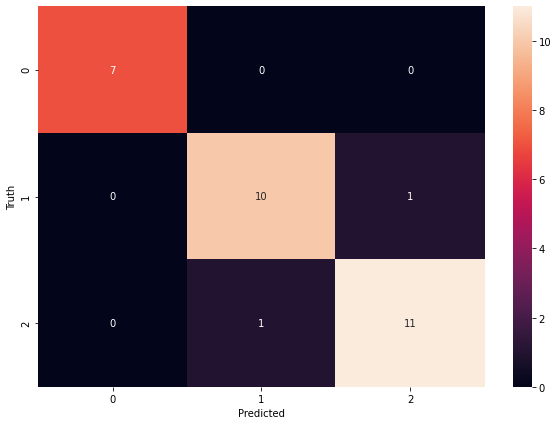

In [78]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)                          #we will make the same confusion matrix for this model

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Here is the confusing matrix for the Random Forest model

## 3. Train Using K Means Clusters

Now K Means Clusters is an unsupervised model, which means it won't tell us what the labels are, but it will simpy form clusters. However, by looking at the resultant clusters, it should be fairly simply to find what the target labels for each cluster is. 

In [102]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)                                           # building our K means model
y_predicted = km.fit_predict(X)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [93]:
iris.target                                                        # target values 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We see our y_predicted has 3 values (0,1,2). These looks like it matches well with our target values. Now we can check the accuracy by comparing the elements one by one.

In [103]:
count = 0;
for i in range(0,150):
    if(y_predicted[i]==iris.target[i]):
        count+=1
    else:
        count+=0

print(count/150)

0.8933333333333333


Using K Means Clusters is an unsupervised learning method. The labels in the y_predicted may not always match with the labels in the target set. Because we identified the first few labels to be zeros, then followed by ones, then followed by twos, we are able to compare the elements one by one.

The labels in the y_predicted simply indicate different groups, not that 0 in y_predicted is equal to 0 in target array. However, from our own intuition, we can classify the groups as there own correct label.